<h2>Fully Connected Neural (FCN) Networks</h2>

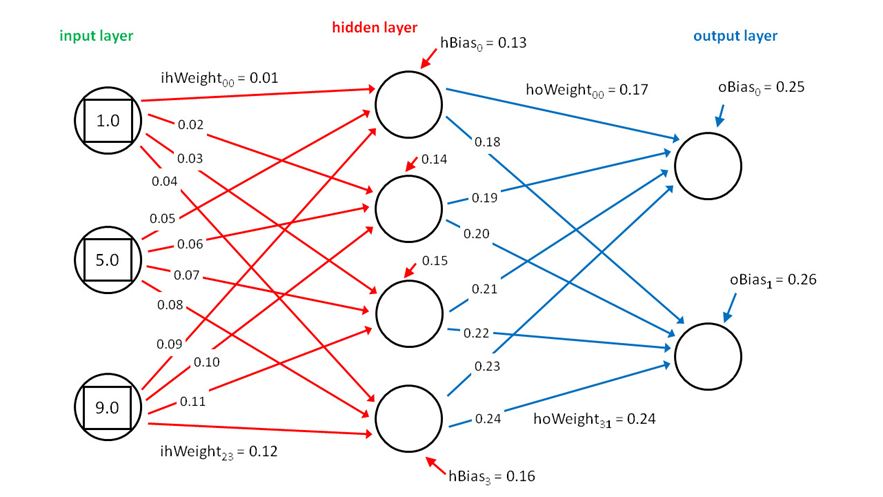

Perform two different evaluations of the network nodes using Sigmoid and ReLu at each node.
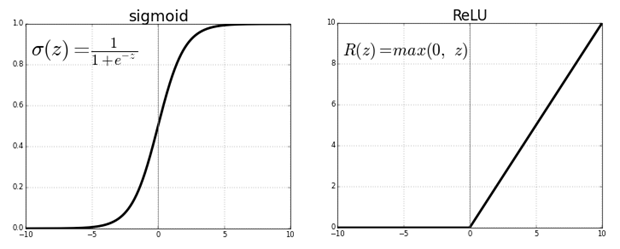

<h3>By hand calculations:</h3>
*note: subscript is layer, superscript is node*

<h4><b>Hidden Layer Nodes:</b></h4>
$W^{0}_{1}$=(0.01,0.05,0.09)<br />
$W^{1}_{1}$=(0.02,0.06,0.10)<br />
$W^{2}_{1}$=(0.03,0.07,0.11)<br />
$W^{3}_{1}$=(0.04,0.08,0.12)<br /><br />

$X_{0}$=(1,5,9)<br />

$b_{0}$=(0.13,0.14,0.15,0.16)

<h5>Node 0:</h5>
z = [0.01*1+0.05*5+0.09*9]+0.13= 1.2 <br />
sigma(z)= $\frac{1}{1+e^{-z}}$ = 0.7685
ReLu(z)=max(0,z)=1.2

<h5>Node 1:</h5>
z = [0.01*1+0.05*5+0.09*9]+0.13= 1.36 <br />
sigma(z)= $\frac{1}{1+e^{-z}}$ = 0.7958
ReLu(z)=max(0,z)=1.36

<h5>Node 2:</h5>
z = [0.01*1+0.05*5+0.09*9]+0.13= 1.52 <br />
sigma(z)= $\frac{1}{1+e^{-z}}$ = 0.8205
ReLu(z)=max(0,z)=1.52

<h5>Node 3:</h5>
z = [0.01*1+0.05*5+0.09*9]+0.13= 1.68 <br />
sigma(z)= $\frac{1}{1+e^{-z}}$ = 0.8429
ReLu(z)=max(0,z)=1.68<br /><br />

Therefore, we get the final output layer values to be approximately  <b>(0.7685,0.7958,0.8205,0.8429)</b> when using the sigmoid activation function and <b>(1.2,1.36,1.52,1.68)</b> when using the ReLu activation function. The values become the inputs used before calculating the output layer values.

<h4><b>Output Layer Nodes:</b></h4>
$W^{0}_{2}$=(0.17,0.19,0.21,0.23)<br />
$W^{1}_{2}$=(0.18,0.20,0.22,0.24)<br /><br />

$X_{1}$=(0.7685,0.7958,0.8205,0.8429)<br />

$b_{1}$=(0.25,0.26)

<h5>Node 0:</h5>
z = [0.17*0.7685+0.19*.7958+0.21*0.8205+0.23*0.8429]+0.25= 0.898019 <br />
sigma(z)= $\frac{1}{1+e^{-z}}$ = 0.7105
ReLu(z)=max(0,z)=0.898019

<h5>Node 1:</h5>
z = [0.18*0.7685+0.2*0.7958+0.22*0.8205+0.24*0.8429]+0.26= 0.940296 <br />
sigma(z)= $\frac{1}{1+e^{-z}}$ = 0.7196
ReLu(z)=max(0,z)=0.940296<br \><br \>

Therefore, we get the final output layer values to be approximately <b>(0.7105,0.7196)</b> when using the sigmoid activation function and <b>(0.898019,0.940296)</b> when implementing the ReLu activation function.

<table>
    <tr>
        <td></td>
        <td><b>Hidden Layer</b></td>
        <td></td>
        <td></td>
        <td></td>
        <td><b>Output Layer</b></td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td><b>Node0</b></td>
        <td><b>Node1</b></td>
        <td><b>Node2</b></td>
        <td><b>Node3</b></td>
        <td><b>Node0</b></td>
        <td><b>Node1</b></td>
    </tr>
    <tr>
        <td><b>Sigmoid</b></td>
        <td>0.7685</td>
        <td>0.7958</td>
        <td>0.8205</td>
        <td>0.8429</td>
        <td>0.7105</td>
        <td>0.7196</td>
    </tr>
    <tr>
        <td><b>Relu</b></td>
        <td>1.2</td>
        <td>1.36</td>
        <td>1.52</td>
        <td>1.68</td>
        <td>0.898019</td>
        <td>0.940296</td>
    </tr>
</table>

<h3>In Python...</h3>

In [2]:
import numpy as np

class fcn(object):
    def __init__(self,inputLayerSize=3,hiddenLayerSize=4,outputLayerSize = 2):
        
        self.inputLayerSize = inputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.outputLayerSize = outputLayerSize

        self.iW = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.oW = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        # Initial biases of 
        self.hBias = np.random.randn(self.hiddenLayerSize)
        self.oBias = np.random.randn(self.outputLayerSize)
    
    def setInputWeights(self,array):
        self.iW = array
    def setOutputWeights(self,array):
        self.oW = array
    def setHiddenBias(self,array):
        self.hBias = array
    def setOutputBias(self,array):
        self.oBias = array
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def reLu(self,z):
        return np.maximum(z,0)
        
    def forwardSigmoid(self,x):
        self.z2 = np.dot(x, self.iW)
        self.a2 = self.sigmoid(self.z2)+self.hBias
        self.z3 = np.dot(self.a2, self.oW)
        yHat = self.sigmoid(self.z3)+self.oBias
        return yHat
    
    def forwardRelu(self,x):
        self.z2 = np.dot(x, self.iW)
        self.a2 = self.reLu(self.z2)+self.hBias
        self.z3 = np.dot(self.a2, self.oW)
        yHat = self.reLu(self.z3)+self.oBias
        return yHat

In [3]:
FCN = fcn()

# Note, could simply design arrays, but in the problem they are linear increments
FCN.setInputWeights(np.arange(0.01,0.13,0.01,dtype=float).reshape(3,4))
FCN.setOutputWeights(np.arange(0.17,0.25,0.01,dtype=float).reshape(4,2))

FCN.setHiddenBias(np.linspace(0.13,0.16,4,dtype=float))
FCN.setOutputBias(np.linspace(0.25,0.27,2,dtype=float))


input_vector = np.array([1.0,5.0,9.0])
print ('Sigmoid Activation : ', FCN.forwardSigmoid(input_vector))
print ('ReLu Activation : ', FCN.forwardRelu(input_vector))

Sigmoid Activation :  [0.92840408 0.95645398]
ReLu Activation :  [1.418  1.4956]
